#Author: SHALWIN A S
## Task-2
###Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [51]:
import pandas as pd

In [52]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [53]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


###Exploitory data analysis

In [55]:
import plotly.express as px
fig = px.histogram(df, x='Age', nbins=10, title='Age Distribution')
fig.show()

In [56]:
fig = px.histogram(df, x='Gender', nbins=10, title='Gender Distribution')
fig.show()

In [57]:
fig = px.histogram(df, x='Spending Score (1-100)', nbins=10, title='Distribution of Spending Score')
fig.show()

### Data preprocessing

In [58]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [59]:
# missing values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [60]:
# categorical data conversion
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int8 
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), int8(1)
memory usage: 6.6 KB


###Feature selection

In [62]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [63]:
# standardising the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Using elbow method to find the optimal clusters

In [64]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

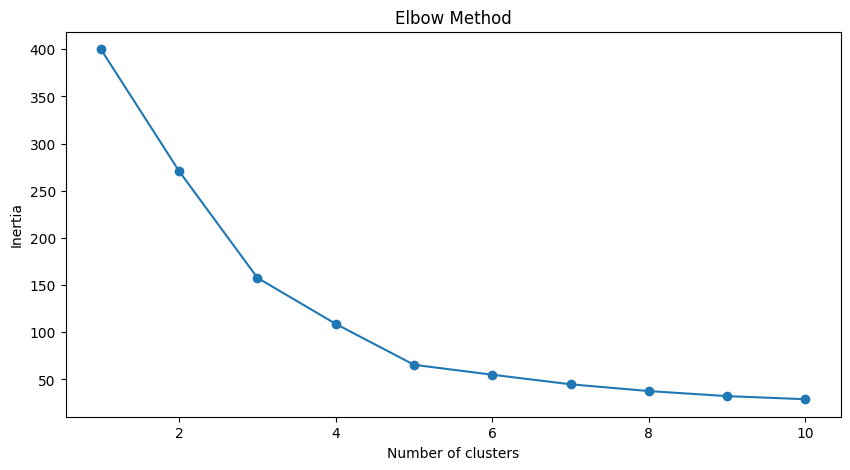

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') # Within-Cluster Sum of Squares (WCSS) - inertia
plt.show()

Applying kmeans

In [66]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [67]:
# adding cluster column
df['Cluster'] = y_kmeans

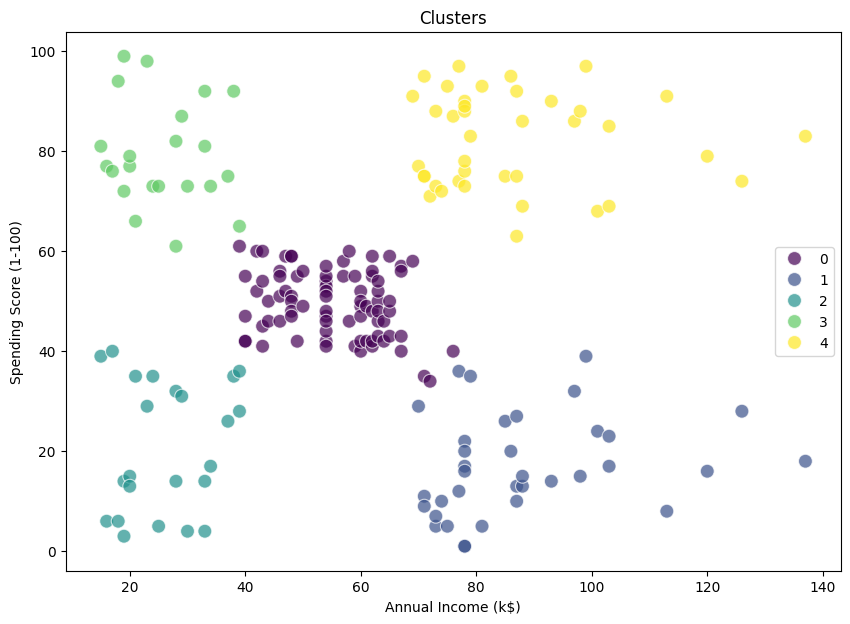

In [68]:
# clusters
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### Model fit

In [69]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [72]:
# inertia
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 65.56840815571681


In [73]:
silhouette= silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.5546571631111091
